In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']='#FFE584'
df=pd.read_csv('D:\Data Analysis\world-happiness-report-2021.csv')
pd.set_option('display.max_columns',100)
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [74]:
df_columns=['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']

In [75]:
df=df[df_columns].copy()

In [76]:
df=df.rename({'Country name':'country_name','Regional indicator':'regional_indicator','Ladder score':'ladder_score','Logged GDP per capita':'logged_gdp','Social support':'social_support','Healthy life expectancy':'healthy_life','Freedom to make life choices':'freedom_life','Generosity':'generosity','Perceptions of corruption':'perception_corruption'},axis=1)

In [77]:
df.columns

Index(['country_name', 'regional_indicator', 'ladder_score', 'logged_gdp',
       'social_support', 'healthy_life', 'freedom_life', 'generosity',
       'perception_corruption'],
      dtype='object')

In [78]:
df.head()

,country_name,regional_indicator,ladder_score,logged_gdp,social_support,healthy_life,freedom_life,generosity,perception_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [79]:
df.isna().sum()

country_name             0
regional_indicator       0
ladder_score             0
logged_gdp               0
social_support           0
healthy_life             0
freedom_life             0
generosity               0
perception_corruption    0
dtype: int64

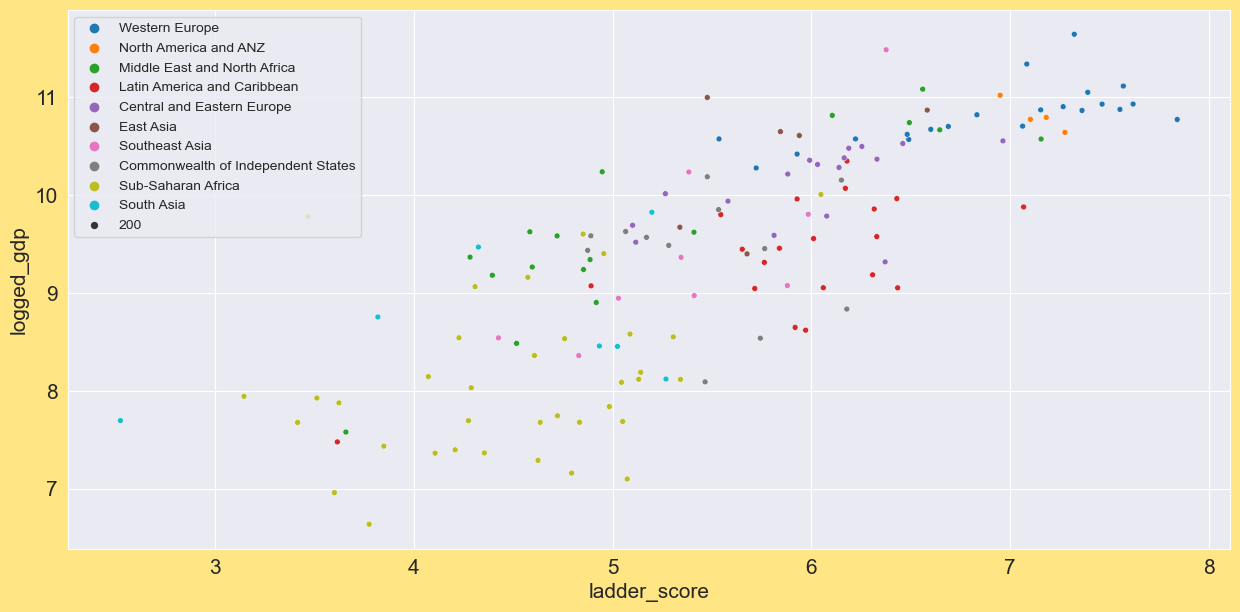

In [80]:
plt.rcParams['figure.figsize']=(15,7)
# plt.title('Happiness score vs GDP')
sns.scatterplot(x=df.ladder_score,y=df.logged_gdp,hue=df.regional_indicator,size=200)
plt.legend(loc='upper left',fontsize='10')
# plt.xlabel=('Happiness score')
# plt.ylabel=('GDP per capita')

In [81]:
gdp_region=df.groupby('regional_indicator')['logged_gdp'].sum()
print(gdp_region)

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: logged_gdp, dtype: float64


<AxesSubplot:ylabel='logged_gdp'>

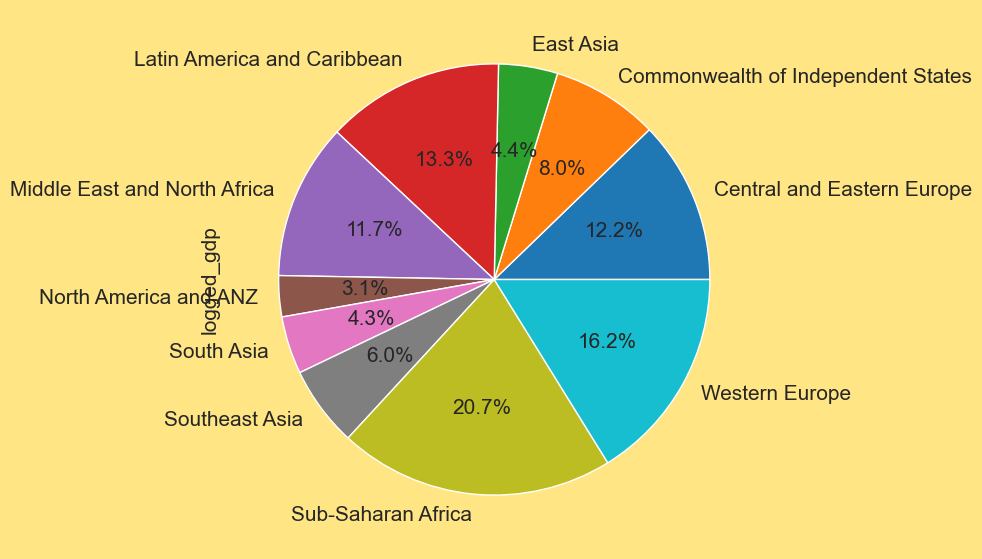

In [82]:
gdp_region.plot.pie(autopct='%1.1f%%')
# plt.title('GDP by region')
# plt.ylabel=('')

In [83]:
#Total countries 
tot_country=df.groupby('regional_indicator')['country_name'].count()
print(tot_country)

regional_indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: country_name, dtype: int64


<AxesSubplot:>

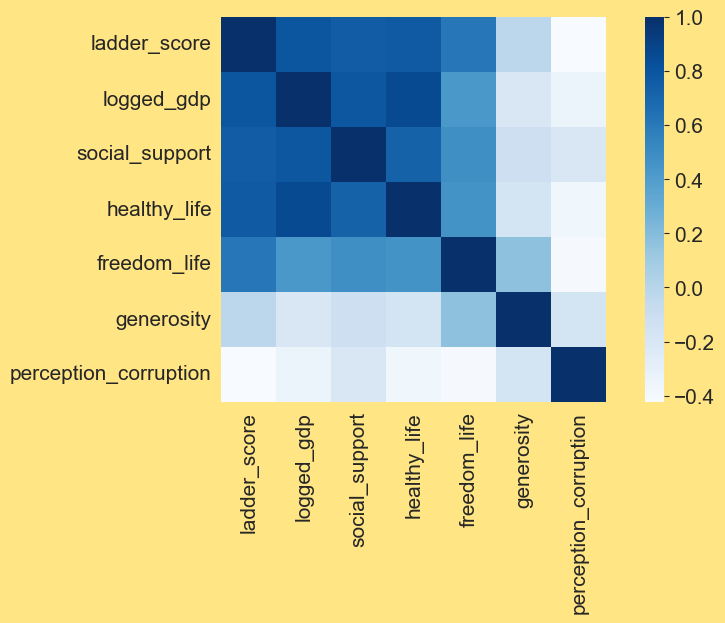

In [84]:
#Correlation map
cor=df.corr(method='pearson')
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=np.bool),cmap='Blues',square=True,ax=ax)

In [85]:
#corruption in regions
corruption=df.groupby('regional_indicator')['perception_corruption'].mean()
corruption

regional_indicator
Central and Eastern Europe            0.850529
Commonwealth of Independent States    0.725083
East Asia                             0.683333
Latin America and Caribbean           0.792600
Middle East and North Africa          0.762235
North America and ANZ                 0.449250
South Asia                            0.797429
Southeast Asia                        0.709111
Sub-Saharan Africa                    0.765944
Western Europe                        0.523095
Name: perception_corruption, dtype: float64

In [86]:
df.dtypes

country_name              object
regional_indicator        object
ladder_score             float64
logged_gdp               float64
social_support           float64
healthy_life             float64
freedom_life             float64
generosity               float64
perception_corruption    float64
dtype: object

<BarContainer object of 10 artists>

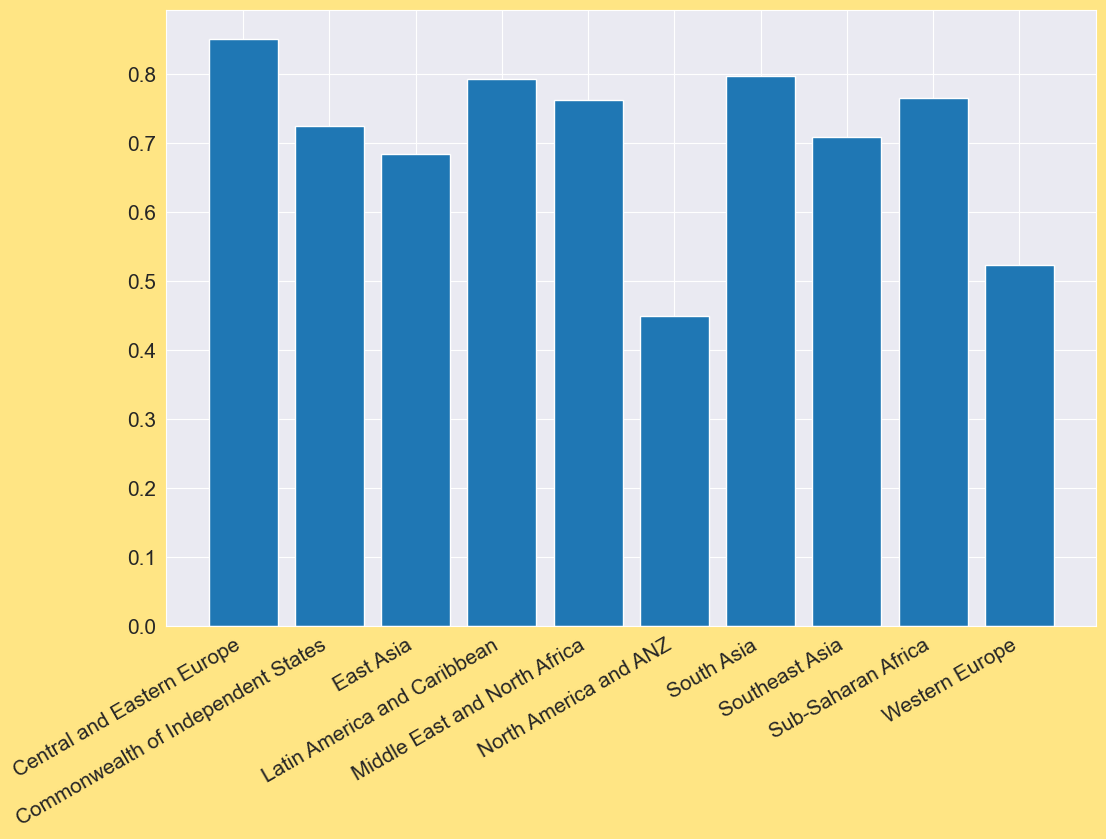

In [87]:
plt.rcParams['figure.figsize']=(12,8)
plt.title=('Perception of corruption in various regions')
plt.xlabel=('Regions')
plt.ylabel=('corruption Index')
plt.xticks(rotation=30,ha='right')
plt.bar(corruption.index,corruption)

In [88]:
top_10=df.head(10)
top_10

,country_name,regional_indicator,ladder_score,logged_gdp,social_support,healthy_life,freedom_life,generosity,perception_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338
5,Norway,Western Europe,7.392,11.053,0.954,73.3,0.960,0.093,0.270
6,Sweden,Western Europe,7.363,10.867,0.934,72.7,0.945,0.086,0.237
7,Luxembourg,Western Europe,7.324,11.647,0.908,72.6,0.907,-0.034,0.386
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.4,0.929,0.134,0.242
9,Austria,Western Europe,7.268,10.906,0.934,73.3,0.908,0.042,0.481


In [89]:
btm_10=df.tail(10)
btm_10

,country_name,regional_indicator,ladder_score,logged_gdp,social_support,healthy_life,freedom_life,generosity,perception_corruption
139,Burundi,Sub-Saharan Africa,3.775,6.635,0.490,53.400,0.626,-0.024,0.607
140,Yemen,Middle East and North Africa,3.658,7.578,0.832,57.122,0.602,-0.147,0.800
141,Tanzania,Sub-Saharan Africa,3.623,7.876,0.702,57.999,0.833,0.183,0.577
142,Haiti,Latin America and Caribbean,3.615,7.477,0.540,55.700,0.593,0.422,0.721
143,Malawi,Sub-Saharan Africa,3.600,6.958,0.537,57.948,0.780,0.038,0.729
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


Text(832.0858585858584, 0.5, 'life expectancy')

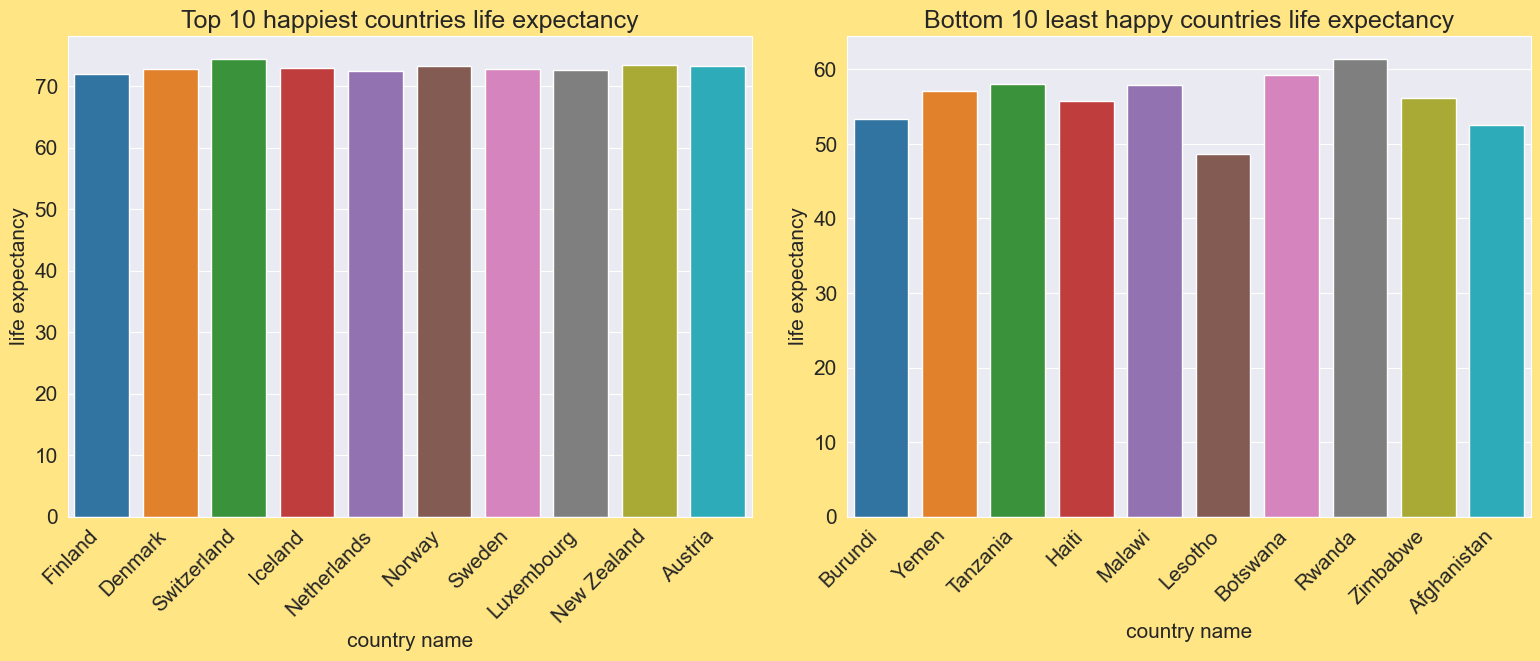

In [90]:
fig,axes=plt.subplots(1,2,figsize=(16,6))
plt.tight_layout(pad=2)
xlabels=top_10.country_name
axes[0].set_title('Top 10 happiest countries life expectancy')
axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=top_10.country_name,y=top_10.healthy_life,ax=axes[0])
axes[0].set_xlabel('country name')
axes[0].set_ylabel('life expectancy')

xlabels=btm_10.country_name
axes[1].set_title('Bottom 10 least happy countries life expectancy')
axes[1].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=btm_10.country_name,y=btm_10.healthy_life,ax=axes[1])
axes[1].set_xlabel('country name')
axes[1].set_ylabel('life expectancy')

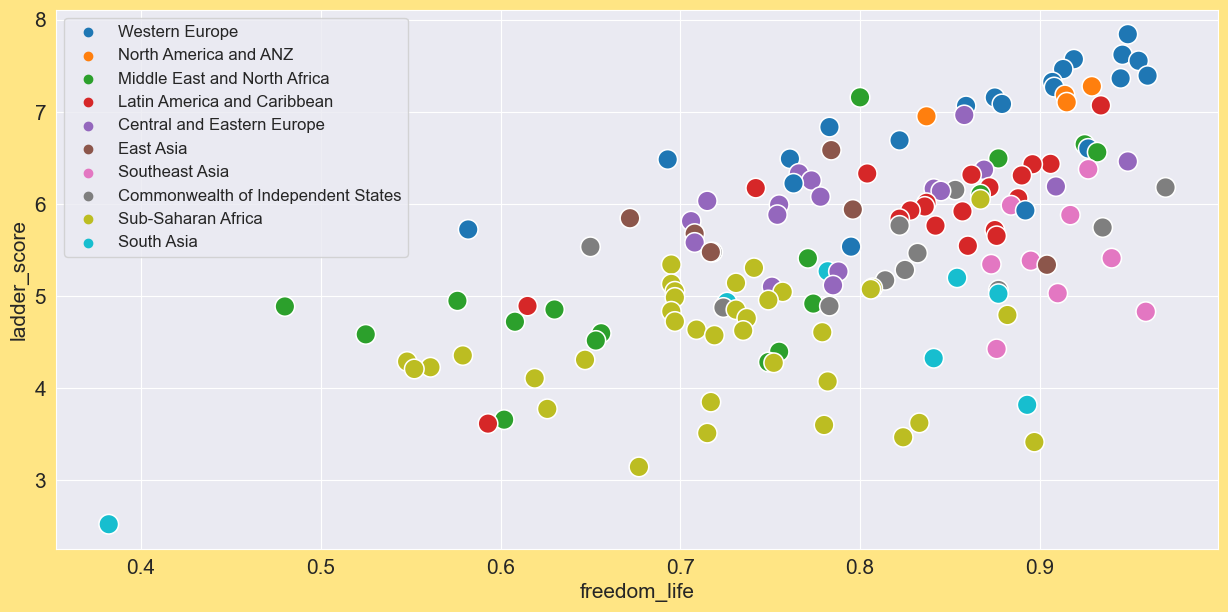

In [91]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=df.freedom_life,y=df.ladder_score,hue=df.regional_indicator,s=200)
plt.legend(loc='upper left',fontsize='12')
# plt.xlabel('Freedom to make life choices')
# plt.ylabel('Happiness score')

<BarContainer object of 10 artists>

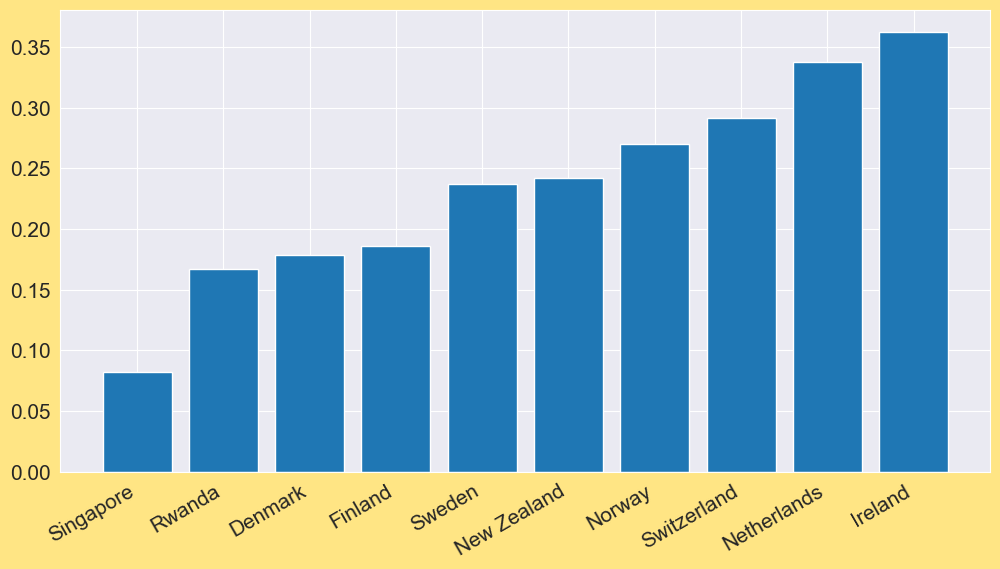

In [92]:
country=df.sort_values(by='perception_corruption').head(10)
plt.rcParams['figure.figsize']=(12,6)
# plt.title('countries with most perception of corruption')
# plt.xlabel('country',fontsize=13)
# plt.ylabel('corruption index',fontsize=13)
plt.xticks(rotation=30,ha='right')
plt.bar(country.country_name,country.perception_corruption)

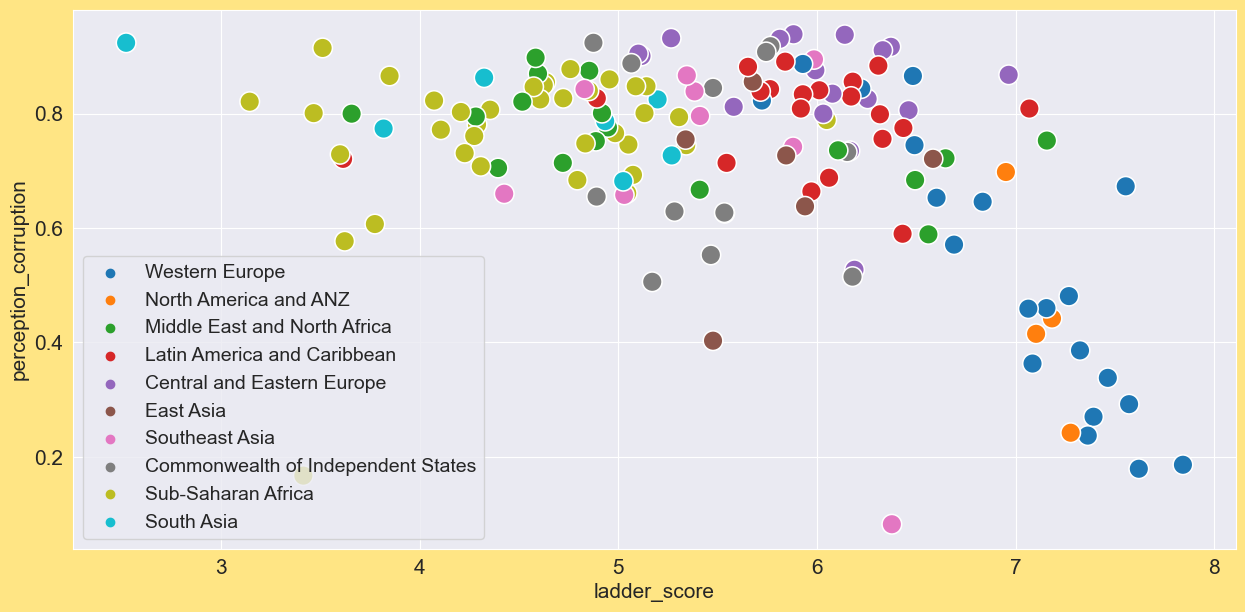

In [93]:
# corruption vs happiness
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=df.ladder_score,y=df.perception_corruption,hue=df.regional_indicator,s=200)
plt.legend(loc='lower left',fontsize='14')
# plt.ylabel('Corruption')
# plt.xlabel('Happiness score')